In [323]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

import glob
import os

from baseline import MultiMethod
from ur import Ur



In [324]:
data_path_multimodel = '/home/panding/code/UR/piv-data/baseline-multimodel'
data_path_multitransform = '/home/panding/code/UR/piv-data/baseline-multitransform'
data_path_ur = '/home/panding/code/UR/piv-data/test'

datas_multimodel = glob.glob(os.path.join(data_path_multimodel, '*.npy'))
datas_multitransform = glob.glob(os.path.join(data_path_multitransform, '*.npy'))
datas_ur = glob.glob(os.path.join(data_path_ur, '*.npy'))

datas_multimodel = sorted(datas_multimodel)
datas_multitransform = sorted(datas_multitransform)
datas_ur = sorted(datas_ur)

randomidx = np.random.permutation(len(datas_multimodel))
datas_multimodel = [datas_multimodel[i] for i in randomidx]
datas_multitransform = [datas_multitransform[i] for i in randomidx]
datas_ur = [datas_ur[i] for i in randomidx]

baseline_1 = MultiMethod(datas_multimodel[0], 0)
baseline_2 = MultiMethod(datas_multitransform[0], 0)

data = np.load(datas_ur[0])
data = data[:4]
# expanded_shape = (2,) + data.shape
# print(expanded_shape)
# expanded_array = np.expand_dims(data, axis=0)
# final_array = np.tile(expanded_array, expanded_shape)

# model_path = '/home/panding/code/UR/UR/ur-model/8-22-4.pt'
model_path = '/home/panding/code/UR/ur-model/model-10.model.pt'
my_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

test = Ur(data, model_path, my_device)
sigma_u, sigma_v = test.get_sigma()

print(datas_multimodel[0])
print(datas_multitransform[0])
print(datas_ur[0])

completed!
/home/panding/code/UR/piv-data/baseline-multimodel/JHTDB_mhd1024_hd_00755.npy
/home/panding/code/UR/piv-data/baseline-multitransform/JHTDB_mhd1024_hd_00755.npy
/home/panding/code/UR/piv-data/test/JHTDB_mhd1024_hd_00755.npy


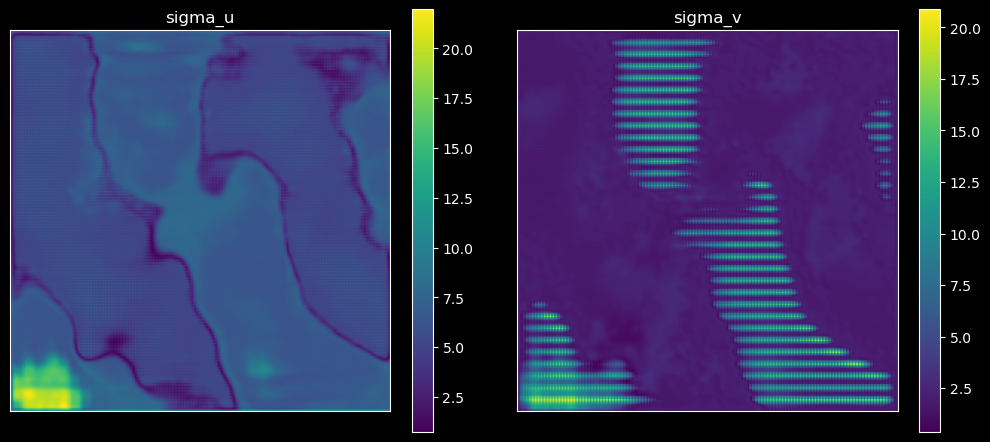

In [325]:
plt.figure(figsize=(12,8))
        
plt.subplot(1, 2, 1)
plt.title('sigma_u')
plt.xticks([])
plt.yticks([])
plt.imshow(np.abs(sigma_u.transpose(1, 2, 0)))
plt.colorbar(fraction=0.05)

plt.subplot(1, 2, 2)
plt.title('sigma_v')
plt.xticks([])
plt.yticks([])
plt.imshow(np.abs(sigma_v.transpose(1, 2, 0)))
plt.colorbar(fraction=0.05)

plt.show()

In [326]:
# baseline_1.show()
# sigma_u, sigma_v = baseline_1.std(show=1)
# sigma_u_t, sigma_v_t = baseline_1.std_truth(show=1)

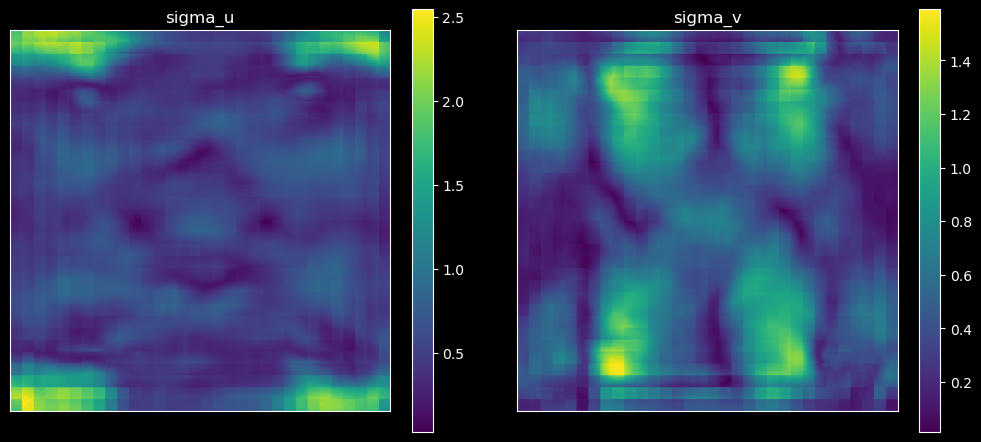

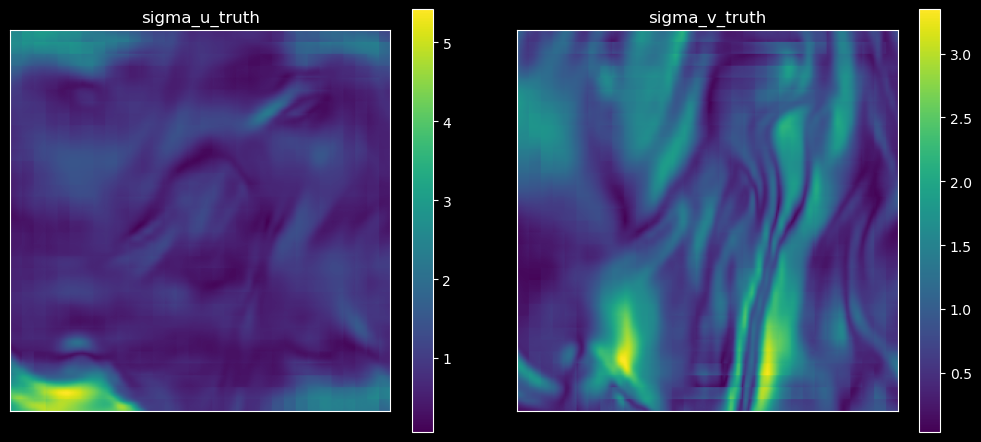

In [327]:
sigma_u, sigma_v = baseline_2.std(show=1)
sigma_u_t, sigma_v_t = baseline_2.std_truth(show=1)